In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
from datetime import timedelta
# sns.set(style="darkgrid")
import requests
import pprint
import re
pd.options.display.max_columns = 999
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv('../Car_Crash/Data/data_cleaned.csv')

In [4]:
feature_list = [
 'Interstate',
 'State_Road',
 'Local_Road_Only',
 'Turnpike',
 'Non_Intersection',
 'Intersection',
 'Signalized_Intersection',
 'Stop_Controlled_Intersection',
 'Unsignalized_Intersection',
 'Alcohol_Related',
 'Drinking_Driver',
 'Underage_Drinking_Driver',
 'Unlicensed',
 'Distracted',
 'Cell_Phone',
 'No_Clearance',
 'Running_Red_Light',
 'Running_Stop_Sign',
 'Tailgating',
 'Cross_Median',
 'Curved_Road',
 'Curve_Driver_Error',
 'Limit_65_MPH',
 'Speeding',
 'Speeding_Related',
 'Aggressive_Driving',
 'Fatigue_/_Asleep',
 'Driver_16_Years_Old',
 'Driver_17_Years_Old',
 'Driver_18_Years_Old',
 'Driver_19_Years_Old',
 'Driver_20_Years_Old',
 'Driver_50_-_64_Years_Old',
 'Driver_65_-_74_Years_Old',
 'Driver_75_Plus',
 'NHTSA_Aggressive_Driving',
 'Weekend',
 'population_zs',
 'median_age_zs',
 'college_zs',
 'unemployment_rate_zs',
 'household_mean_income_zs',
 'Crash_Month_1',
 'Crash_Month_2',
 'Crash_Month_3',
 'Crash_Month_4',
 'Crash_Month_5',
 'Crash_Month_6',
 'Crash_Month_7',
 'Crash_Month_8',
 'Crash_Month_9',
 'Crash_Month_10',
 'Crash_Month_11',
 'Crash_Month_12',
 'Hour_of_Day_0.0',
 'Hour_of_Day_1.0',
 'Hour_of_Day_2.0',
 'Hour_of_Day_3.0',
 'Hour_of_Day_4.0',
 'Hour_of_Day_5.0',
 'Hour_of_Day_6.0',
 'Hour_of_Day_7.0',
 'Hour_of_Day_8.0',
 'Hour_of_Day_9.0',
 'Hour_of_Day_10.0',
 'Hour_of_Day_11.0',
 'Hour_of_Day_12.0',
 'Hour_of_Day_13.0',
 'Hour_of_Day_14.0',
 'Hour_of_Day_15.0',
 'Hour_of_Day_16.0',
 'Hour_of_Day_17.0',
 'Hour_of_Day_18.0',
 'Hour_of_Day_19.0',
 'Hour_of_Day_20.0',
 'Hour_of_Day_21.0',
 'Hour_of_Day_22.0',
 'Hour_of_Day_23.0',
 'Illumination_Dark no street lights',
 'Illumination_Dark street lights',
 'Illumination_Dark unknown roadway lighting',
 'Illumination_Dawn',
 'Illumination_Daylight',
 'Illumination_Dusk',
 'Illumination_Other',
 'Weather_Fog',
 'Weather_No adverse conditions',
 'Weather_Other',
 'Weather_Rain',
 'Weather_Rain and fog',
 'Weather_Sleet and fog',
 'Weather_Sleet(hail)',
 'Weather_Snow',
 'Road_Condition_Dry',
 'Road_Condition_Ice',
 'Road_Condition_Ice Patches',
 'Road_Condition_Other',
 'Road_Condition_Sand/mud/dirt/oil/or gravel',
 'Road_Condition_Slush',
 'Road_Condition_Snow covered',
 'Road_Condition_Water - standing or moving',
 'Road_Condition_Wet',
 'Urban_/_Rural_Rural',
 'Urban_/_Rural_Urban',
 'Urban_/_Rural_Urbanized']

In [5]:
feature_list_boolean = [
 'Interstate',
 'State_Road',
 'Local_Road_Only',
 'Turnpike',
 'Non_Intersection',
 'Intersection',
 'Signalized_Intersection',
 'Stop_Controlled_Intersection',
 'Unsignalized_Intersection',
 'Alcohol_Related',
 'Drinking_Driver',
 'Underage_Drinking_Driver',
 'Unlicensed',
 'Distracted',
 'Cell_Phone',
 'No_Clearance',
 'Running_Red_Light',
 'Running_Stop_Sign',
 'Tailgating',
 'Cross_Median',
 'Curved_Road',
 'Curve_Driver_Error',
 'Limit_65_MPH',
 'Speeding',
 'Speeding_Related',
 'Aggressive_Driving',
 'Fatigue_/_Asleep',
 'Driver_16_Years_Old',
 'Driver_17_Years_Old',
 'Driver_18_Years_Old',
 'Driver_19_Years_Old',
 'Driver_20_Years_Old',
 'Driver_50_-_64_Years_Old',
 'Driver_65_-_74_Years_Old',
 'Driver_75_Plus',
 'NHTSA_Aggressive_Driving',
 'Weekend',
 'Crash_Month_1',
 'Crash_Month_2',
 'Crash_Month_3',
 'Crash_Month_4',
 'Crash_Month_5',
 'Crash_Month_6',
 'Crash_Month_7',
 'Crash_Month_8',
 'Crash_Month_9',
 'Crash_Month_10',
 'Crash_Month_11',
 'Crash_Month_12',
 'Hour_of_Day_0.0',
 'Hour_of_Day_1.0',
 'Hour_of_Day_2.0',
 'Hour_of_Day_3.0',
 'Hour_of_Day_4.0',
 'Hour_of_Day_5.0',
 'Hour_of_Day_6.0',
 'Hour_of_Day_7.0',
 'Hour_of_Day_8.0',
 'Hour_of_Day_9.0',
 'Hour_of_Day_10.0',
 'Hour_of_Day_11.0',
 'Hour_of_Day_12.0',
 'Hour_of_Day_13.0',
 'Hour_of_Day_14.0',
 'Hour_of_Day_15.0',
 'Hour_of_Day_16.0',
 'Hour_of_Day_17.0',
 'Hour_of_Day_18.0',
 'Hour_of_Day_19.0',
 'Hour_of_Day_20.0',
 'Hour_of_Day_21.0',
 'Hour_of_Day_22.0',
 'Hour_of_Day_23.0',
 'Illumination_Dark no street lights',
 'Illumination_Dark street lights',
 'Illumination_Dark unknown roadway lighting',
 'Illumination_Dawn',
 'Illumination_Daylight',
 'Illumination_Dusk',
 'Illumination_Other',
 'Weather_Fog',
 'Weather_No adverse conditions',
 'Weather_Other',
 'Weather_Rain',
 'Weather_Rain and fog',
 'Weather_Sleet and fog',
 'Weather_Sleet(hail)',
 'Weather_Snow',
 'Road_Condition_Dry',
 'Road_Condition_Ice',
 'Road_Condition_Ice Patches',
 'Road_Condition_Other',
 'Road_Condition_Sand/mud/dirt/oil/or gravel',
 'Road_Condition_Slush',
 'Road_Condition_Snow covered',
 'Road_Condition_Water - standing or moving',
 'Road_Condition_Wet',
 'Urban_/_Rural_Rural',
 'Urban_/_Rural_Urban',
 'Urban_/_Rural_Urbanized']

In [6]:
df[feature_list_boolean] = df[feature_list_boolean].replace(0.0,-1)

In [20]:
df1 = df[df['Crash_Year'] == 2017]

In [21]:
X = df1[feature_list].values
y = df1.Collision_Type_num.values

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [27]:
epochs = 200
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [31]:

# sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(X, y, epochs=epochs, batch_size=64)

Epoch 1/200
123012/123012 [==============================] - 8s 62us/step - loss: 1.0905 - acc: 0.6549
Epoch 2/200
123012/123012 [==============================] - 7s 58us/step - loss: 1.0852 - acc: 0.6563
Epoch 3/200
123012/123012 [==============================] - 7s 59us/step - loss: 1.0806 - acc: 0.6569
Epoch 4/200
123012/123012 [==============================] - 7s 59us/step - loss: 1.0770 - acc: 0.6580
Epoch 5/200
123012/123012 [==============================] - 7s 58us/step - loss: 1.0741 - acc: 0.6589
Epoch 6/200
123012/123012 [==============================] - 7s 60us/step - loss: 1.0704 - acc: 0.6591
Epoch 7/200
123012/123012 [==============================] - 7s 61us/step - loss: 1.0682 - acc: 0.6604
Epoch 8/200
123012/123012 [==============================] - 7s 61us/step - loss: 1.0662 - acc: 0.6593
Epoch 9/200
123012/123012 [==============================] - 7s 60us/step - loss: 1.0629 - acc: 0.6616
Epoch 10/200
123012/123012 [==============================] - 7s 59us/ste

123012/123012 [==============================] - 7s 60us/step - loss: 0.8491 - acc: 0.7298
Epoch 158/200
123012/123012 [==============================] - 7s 61us/step - loss: 0.8445 - acc: 0.7319
Epoch 159/200
123012/123012 [==============================] - 8s 61us/step - loss: 0.8446 - acc: 0.7320
Epoch 160/200
123012/123012 [==============================] - 8s 61us/step - loss: 0.8415 - acc: 0.7336
Epoch 161/200
123012/123012 [==============================] - 8s 63us/step - loss: 0.8411 - acc: 0.7336
Epoch 162/200
123012/123012 [==============================] - 8s 63us/step - loss: 0.8415 - acc: 0.7324
Epoch 163/200
123012/123012 [==============================] - 8s 65us/step - loss: 0.8399 - acc: 0.7335
Epoch 164/200
123012/123012 [==============================] - 8s 66us/step - loss: 0.8383 - acc: 0.7349
Epoch 165/200
123012/123012 [==============================] - 7s 60us/step - loss: 0.8358 - acc: 0.7351
Epoch 166/200
123012/123012 [==============================] - 8s 62u

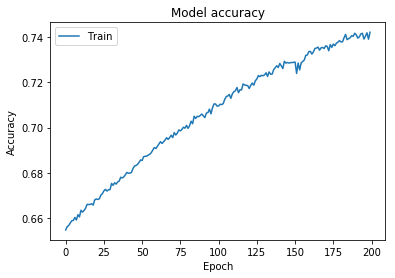

In [33]:
# train on 100% of 2017 data, test on 2016 data
# learning rate not decaying, batch size 64
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

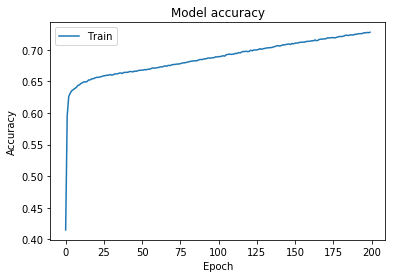

In [26]:
# train on 100% of 2017 data, test on 2016 data
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

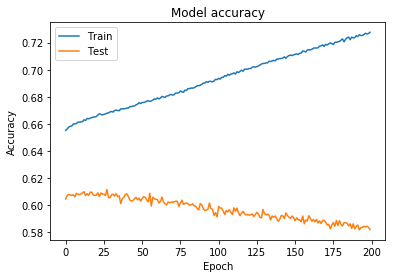

In [15]:
# train on 80% of 2017 data, validate on 20% of 2017 data, test on 2016 data
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
df_2016 = df[df['Crash_Year'] == 2016]

In [35]:
X_2016 = df_2016[feature_list].values
y_2016 = df_2016.Collision_Type_num.values

In [36]:
test_loss, test_acc = model.evaluate(X_2016, y_2016)

127102/127102 [==============================] - 5s 39us/step


In [37]:
print('Test accuracy:', test_acc)

Test accuracy: 0.6005098267598815


In [38]:
y_pred = np.argmax(model.predict(X_2016),axis=1)

In [40]:
from sklearn import metrics

In [41]:
print(metrics.balanced_accuracy_score(y_2016, y_pred))
print(metrics.classification_report(y_2016, y_pred))
print(metrics.confusion_matrix(y_2016, y_pred))

0.31587655465669895
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     34187
           1       0.00      0.00      0.00       383
           2       0.27      0.09      0.13      4682
           3       0.61      0.71      0.66     37603
           4       0.29      0.23      0.26      3995
           5       0.09      0.07      0.08      4243
           6       0.48      0.51      0.49      4664
           7       0.66      0.62      0.64     29019
           8       0.22      0.02      0.04      2498
           9       0.24      0.12      0.16      5828

   micro avg       0.60      0.60      0.60    127102
   macro avg       0.35      0.32      0.32    127102
weighted avg       0.57      0.60      0.58    127102

[[26841     0   292  3262   784   193   165  2223    34   393]
 [   97     0     2   114    41    11    14    69     1    34]
 [ 2038     0   418  1332    70    68    50   546    56   104]
 [ 2200     0   350 26842   429 

C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# increase batach size

In [42]:
df1 = df[df['Crash_Year'] == 2017]

In [43]:
X = df1[feature_list].values
y = df1.Collision_Type_num.values

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [45]:
epochs = 200
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [46]:

# sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(X, y, epochs=epochs, batch_size=128)

Epoch 1/200
123012/123012 [==============================] - 4s 35us/step - loss: 1.7317 - acc: 0.3248
Epoch 2/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.3758 - acc: 0.5752
Epoch 3/200
123012/123012 [==============================] - 4s 32us/step - loss: 1.2874 - acc: 0.6106
Epoch 4/200
123012/123012 [==============================] - 4s 32us/step - loss: 1.2360 - acc: 0.6189
Epoch 5/200
123012/123012 [==============================] - 4s 32us/step - loss: 1.1910 - acc: 0.6311
Epoch 6/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1675 - acc: 0.6342
Epoch 7/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1479 - acc: 0.6391
Epoch 8/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1370 - acc: 0.6401
Epoch 9/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1304 - acc: 0.6422
Epoch 10/200
123012/123012 [==============================] - 4s 31us/ste

123012/123012 [==============================] - 4s 30us/step - loss: 0.8518 - acc: 0.7295
Epoch 158/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1025 - acc: 0.6617
Epoch 159/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.9646 - acc: 0.6967
Epoch 160/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.9041 - acc: 0.7162
Epoch 161/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.9197 - acc: 0.7106
Epoch 162/200
123012/123012 [==============================] - 4s 32us/step - loss: 0.8687 - acc: 0.7270
Epoch 163/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.8628 - acc: 0.7283
Epoch 164/200
123012/123012 [==============================] - 4s 30us/step - loss: 0.8506 - acc: 0.7339
Epoch 165/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.8406 - acc: 0.7362
Epoch 166/200
123012/123012 [==============================] - 4s 31u

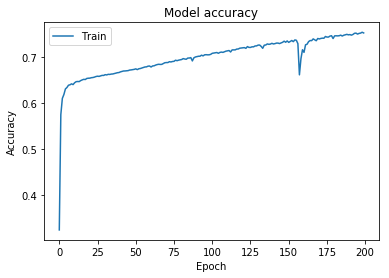

In [48]:
# train on 100% of 2017 data, test on 2016 data
# learning rate not decaying, batch size 128
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [49]:
test_loss, test_acc = model.evaluate(X_2016, y_2016)

127102/127102 [==============================] - 5s 39us/step


In [50]:
print('Test accuracy:', test_acc)

Test accuracy: 0.5892511526232102


In [38]:
y_pred = np.argmax(model.predict(X_2016),axis=1)

In [41]:
print(metrics.balanced_accuracy_score(y_2016, y_pred))
print(metrics.classification_report(y_2016, y_pred))
print(metrics.confusion_matrix(y_2016, y_pred))

0.31587655465669895
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     34187
           1       0.00      0.00      0.00       383
           2       0.27      0.09      0.13      4682
           3       0.61      0.71      0.66     37603
           4       0.29      0.23      0.26      3995
           5       0.09      0.07      0.08      4243
           6       0.48      0.51      0.49      4664
           7       0.66      0.62      0.64     29019
           8       0.22      0.02      0.04      2498
           9       0.24      0.12      0.16      5828

   micro avg       0.60      0.60      0.60    127102
   macro avg       0.35      0.32      0.32    127102
weighted avg       0.57      0.60      0.58    127102

[[26841     0   292  3262   784   193   165  2223    34   393]
 [   97     0     2   114    41    11    14    69     1    34]
 [ 2038     0   418  1332    70    68    50   546    56   104]
 [ 2200     0   350 26842   429 

C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 5 layers

In [42]:
df1 = df[df['Crash_Year'] == 2017]

In [83]:
X = df1[feature_list].values
y = df1.Collision_Type_num.values

In [84]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [85]:
epochs = 40
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [86]:
from sklearn.metrics import confusion_matrix

In [88]:
# class SensitivitySpecificityCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if epoch % 10 == 1:
#             x_test = self.validation_data[0]
#             y_test = self.validation_data[1]
#             # x_test, y_test = self.validation_data
#             predictions = self.model.predict(x_test)
#             predictions = np.argmax(predictions,axis=1)
#             c = confusion_matrix(y_test, predictions)

            print('Confusion matrix:\n', c)
# sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


IndentationError: unexpected indent (<ipython-input-88-9733847857fe>, line 11)

In [89]:
history = model.fit(X, y, epochs=epochs, batch_size=128, validation_data=(X_2016, y_2016),
                   verbose=1 # , callbacks=[SensitivitySpecificityCallback()]
                   )

Train on 123012 samples, validate on 127102 samples
Epoch 1/40
123012/123012 [==============================] - 4s 30us/step - loss: 1.2612 - acc: 0.5959 - val_loss: 1.2099 - val_acc: 0.6180
Epoch 2/40
123012/123012 [==============================] - 3s 24us/step - loss: 1.1379 - acc: 0.6363 - val_loss: 1.2603 - val_acc: 0.5957
Epoch 3/40
123012/123012 [==============================] - 3s 24us/step - loss: 1.1163 - acc: 0.6420 - val_loss: 1.1990 - val_acc: 0.6209
Epoch 4/40
123012/123012 [==============================] - 3s 25us/step - loss: 1.1058 - acc: 0.6445 - val_loss: 1.6049 - val_acc: 0.5144
Epoch 5/40
123012/123012 [==============================] - 3s 25us/step - loss: 1.0968 - acc: 0.6477 - val_loss: 1.3121 - val_acc: 0.5733
Epoch 6/40
123012/123012 [==============================] - 3s 24us/step - loss: 1.0922 - acc: 0.6481 - val_loss: 1.3423 - val_acc: 0.5727
Epoch 7/40
123012/123012 [==============================] - 3s 25us/step - loss: 1.0872 - acc: 0.6489 - val_loss: 

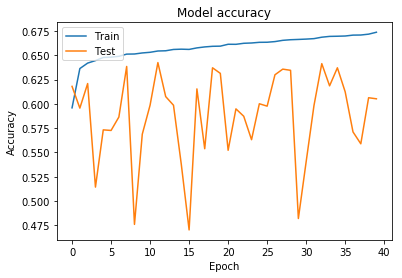

In [90]:
# train on 2017 data, validate on 2016 data
# 5 layers
# learning rate not decaying, batch size 128
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [91]:
test_loss, test_acc = model.evaluate(X_2016, y_2016)

127102/127102 [==============================] - 4s 31us/step


In [92]:
print('Test accuracy:', test_acc)

Test accuracy: 0.6052225771418294


In [93]:
y_pred = np.argmax(model.predict(X_2016),axis=1)

In [94]:
print(metrics.balanced_accuracy_score(y_2016, y_pred))
print(metrics.classification_report(y_2016, y_pred))
print(metrics.confusion_matrix(y_2016, y_pred))

0.34858465107580716
              precision    recall  f1-score   support

           0       0.68      0.74      0.71     34187
           1       0.00      0.00      0.00       383
           2       0.28      0.15      0.20      4682
           3       0.63      0.79      0.70     37603
           4       0.17      0.55      0.26      3995
           5       0.16      0.00      0.01      4243
           6       0.51      0.61      0.56      4664
           7       0.77      0.55      0.64     29019
           8       0.29      0.04      0.07      2498
           9       0.33      0.06      0.10      5828

   micro avg       0.61      0.61      0.61    127102
   macro avg       0.38      0.35      0.32    127102
weighted avg       0.61      0.61      0.59    127102

[[25175     0   808  3038  3768    10   130  1063    42   153]
 [  109     0     1   111   130     0     4    25     0     3]
 [ 1839     0   720  1218   392     2    34   337    86    54]
 [ 2093     0   388 29630  1586 

C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 20 layers

In [42]:
df1 = df[df['Crash_Year'] == 2017]

In [83]:
X = df1[feature_list].values
y = df1.Collision_Type_num.values

In [100]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [101]:
epochs = 200
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [86]:
from sklearn.metrics import confusion_matrix

In [102]:
# class SensitivitySpecificityCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if epoch % 10 == 1:
#             x_test = self.validation_data[0]
#             y_test = self.validation_data[1]
#             # x_test, y_test = self.validation_data
#             predictions = self.model.predict(x_test)
#             predictions = np.argmax(predictions,axis=1)
#             c = confusion_matrix(y_test, predictions)

# sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [103]:
history = model.fit(X, y, epochs=epochs, batch_size=128, validation_data=(X_2016, y_2016),
                   verbose=1 # , callbacks=[SensitivitySpecificityCallback()]
                   )

Train on 123012 samples, validate on 127102 samples
Epoch 1/200
123012/123012 [==============================] - 6s 52us/step - loss: 1.7161 - acc: 0.3372 - val_loss: 2.0617 - val_acc: 0.2992
Epoch 2/200
123012/123012 [==============================] - 6s 45us/step - loss: 1.3358 - acc: 0.5949 - val_loss: 2.0439 - val_acc: 0.4030
Epoch 3/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.2449 - acc: 0.6156 - val_loss: 1.4964 - val_acc: 0.5363
Epoch 4/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.1969 - acc: 0.6265 - val_loss: 1.2452 - val_acc: 0.6222
Epoch 5/200
123012/123012 [==============================] - 6s 48us/step - loss: 1.1752 - acc: 0.6327 - val_loss: 2.9191 - val_acc: 0.2398
Epoch 6/200
123012/123012 [==============================] - 6s 45us/step - loss: 1.2168 - acc: 0.6220 - val_loss: 1.3604 - val_acc: 0.6025
Epoch 7/200
123012/123012 [==============================] - 6s 45us/step - loss: 1.1630 - acc: 0.6368 - val

Epoch 59/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0146 - acc: 0.6768 - val_loss: 1.2102 - val_acc: 0.6246
Epoch 60/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0108 - acc: 0.6793 - val_loss: 1.4134 - val_acc: 0.5266
Epoch 61/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0105 - acc: 0.6802 - val_loss: 1.1769 - val_acc: 0.6360
Epoch 62/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0068 - acc: 0.6805 - val_loss: 1.3674 - val_acc: 0.5716
Epoch 63/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0038 - acc: 0.6809 - val_loss: 1.3821 - val_acc: 0.5715
Epoch 64/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0040 - acc: 0.6819 - val_loss: 1.1910 - val_acc: 0.6298
Epoch 65/200
123012/123012 [==============================] - 6s 46us/step - loss: 1.0006 - acc: 0.6822 - val_loss: 1.1780 - val_acc: 0.6362
Epoch 66/200


Epoch 117/200
123012/123012 [==============================] - 5s 43us/step - loss: 0.9088 - acc: 0.7122 - val_loss: 1.3475 - val_acc: 0.6147
Epoch 118/200
123012/123012 [==============================] - 5s 42us/step - loss: 0.8982 - acc: 0.7157 - val_loss: 1.3626 - val_acc: 0.6078
Epoch 119/200
123012/123012 [==============================] - 5s 42us/step - loss: 0.8983 - acc: 0.7166 - val_loss: 1.2633 - val_acc: 0.6164
Epoch 120/200
123012/123012 [==============================] - 5s 43us/step - loss: 0.8929 - acc: 0.7175 - val_loss: 2.4945 - val_acc: 0.4085
Epoch 121/200
123012/123012 [==============================] - 5s 42us/step - loss: 0.9269 - acc: 0.7072 - val_loss: 1.3996 - val_acc: 0.5463
Epoch 122/200
123012/123012 [==============================] - 5s 42us/step - loss: 0.8952 - acc: 0.7167 - val_loss: 1.3922 - val_acc: 0.5939
Epoch 123/200
123012/123012 [==============================] - 5s 44us/step - loss: 0.8923 - acc: 0.7173 - val_loss: 1.2795 - val_acc: 0.6081
Epoch 

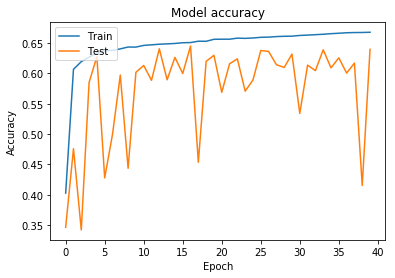

In [99]:
# train on 2017 data, validate on 2016 data
# 5 layers
# learning rate not decaying, batch size 128
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

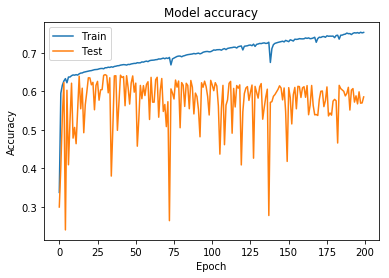

In [104]:
# train on 2017 data, validate on 2016 data
# 20 layers
# learning rate not decaying, batch size 128
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 20 layers train on 2017 test on 20% data of 2016

In [6]:
df1 = df[df['Crash_Year'].isin([2017])]

In [7]:
X = df1[feature_list].values
y = df1.Collision_Type_num.values

In [8]:
df_2016 = df[df['Crash_Year'] == 2016].sample(frac=0.2, replace=False, random_state=0)

X_2016 = df_2016[feature_list].values
y_2016 = df_2016.Collision_Type_num.values

In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# model = keras.Sequential([
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#         keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#         keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#         keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [10]:
epochs = 200
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [20]:
from sklearn import metrics

In [18]:
from sklearn.metrics import confusion_matrix

In [11]:
# class SensitivitySpecificityCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if epoch % 10 == 1:
#             x_test = self.validation_data[0]
#             y_test = self.validation_data[1]
#             # x_test, y_test = self.validation_data
#             predictions = self.model.predict(x_test)
#             predictions = np.argmax(predictions,axis=1)
#             c = confusion_matrix(y_test, predictions)

# sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(X, y, epochs=epochs, batch_size=128, validation_data=(X_2016, y_2016),
                   verbose=1 # , callbacks=[SensitivitySpecificityCallback()]
                   )

Train on 123012 samples, validate on 25420 samples
Epoch 1/200
123012/123012 [==============================] - 5s 42us/step - loss: 1.6083 - acc: 0.4237 - val_loss: 2.9872 - val_acc: 0.2673
Epoch 2/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.3204 - acc: 0.5983 - val_loss: 1.3415 - val_acc: 0.6013
Epoch 3/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.2400 - acc: 0.6163 - val_loss: 1.3728 - val_acc: 0.5534
Epoch 4/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.2046 - acc: 0.6268 - val_loss: 1.7026 - val_acc: 0.4046
Epoch 5/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1809 - acc: 0.6300 - val_loss: 1.6809 - val_acc: 0.5340
Epoch 6/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1634 - acc: 0.6354 - val_loss: 1.7258 - val_acc: 0.5647
Epoch 7/200
123012/123012 [==============================] - 4s 31us/step - loss: 1.1491 - acc: 0.6374 - val_

Epoch 59/200
123012/123012 [==============================] - 4s 33us/step - loss: 1.0092 - acc: 0.6779 - val_loss: 1.2459 - val_acc: 0.6247
Epoch 60/200
123012/123012 [==============================] - 4s 33us/step - loss: 1.0075 - acc: 0.6784 - val_loss: 1.2459 - val_acc: 0.5843
Epoch 61/200
123012/123012 [==============================] - 4s 33us/step - loss: 1.0090 - acc: 0.6786 - val_loss: 1.5397 - val_acc: 0.4869
Epoch 62/200
123012/123012 [==============================] - 4s 32us/step - loss: 1.0105 - acc: 0.6776 - val_loss: 1.2055 - val_acc: 0.6250
Epoch 63/200
123012/123012 [==============================] - 4s 32us/step - loss: 1.0020 - acc: 0.6803 - val_loss: 1.4178 - val_acc: 0.5736
Epoch 64/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.9991 - acc: 0.6812 - val_loss: 1.2098 - val_acc: 0.6263
Epoch 65/200
123012/123012 [==============================] - 4s 31us/step - loss: 0.9985 - acc: 0.6822 - val_loss: 1.4002 - val_acc: 0.5819
Epoch 66/200


Epoch 117/200
123012/123012 [==============================] - 4s 32us/step - loss: 0.9032 - acc: 0.7111 - val_loss: 1.9011 - val_acc: 0.4749
Epoch 118/200
123012/123012 [==============================] - 4s 32us/step - loss: 0.9186 - acc: 0.7061 - val_loss: 1.3334 - val_acc: 0.5994
Epoch 119/200
123012/123012 [==============================] - 4s 32us/step - loss: 0.9009 - acc: 0.7127 - val_loss: 1.4030 - val_acc: 0.5821
Epoch 120/200
123012/123012 [==============================] - 4s 32us/step - loss: 0.9054 - acc: 0.7090 - val_loss: 1.3310 - val_acc: 0.6137
Epoch 121/200
123012/123012 [==============================] - 4s 32us/step - loss: 0.8985 - acc: 0.7128 - val_loss: 5.0771 - val_acc: 0.3050
Epoch 122/200
123012/123012 [==============================] - 4s 33us/step - loss: 1.0715 - acc: 0.6593 - val_loss: 1.2152 - val_acc: 0.6191
Epoch 123/200
123012/123012 [==============================] - 4s 33us/step - loss: 0.9656 - acc: 0.6908 - val_loss: 1.2453 - val_acc: 0.6251
Epoch 

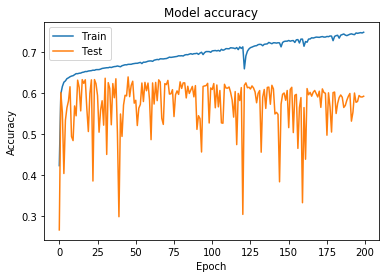

In [13]:
# train on 2017 data, validate on 20% of 2016 data
# 20 layers 
# learning rate not decaying, batch size 128
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_2016, y_2016)

25420/25420 [==============================] - 1s 36us/step


In [15]:
print('Test accuracy:', test_acc)

Test accuracy: 0.5926435877261998


In [16]:
y_pred = np.argmax(model.predict(X_2016),axis=1)

In [21]:
print(metrics.balanced_accuracy_score(y_2016, y_pred))
print(metrics.classification_report(y_2016, y_pred))
print(metrics.confusion_matrix(y_2016, y_pred))

0.28796497573146507
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6713
           1       0.00      0.00      0.00        69
           2       0.22      0.04      0.07       921
           3       0.55      0.81      0.65      7656
           4       0.32      0.12      0.17       805
           5       0.09      0.01      0.03       873
           6       0.45      0.52      0.48       943
           7       0.66      0.57      0.61      5795
           8       0.08      0.02      0.04       489
           9       0.23      0.07      0.10      1156

   micro avg       0.59      0.59      0.59     25420
   macro avg       0.33      0.29      0.29     25420
weighted avg       0.55      0.59      0.56     25420

[[4816    0   43 1124   80    6   30  532   26   56]
 [  18    0    0   31    4    0    2   10    1    3]
 [ 337    0   40  380    8    5    9   92   39   11]
 [ 281    0   35 6218   28   55  346  609   33   51]
 [ 277   

C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 3 layers train on 60% of 2014-2017 validate on 20% test on 20%

In [105]:
df1 = df[df['Crash_Year'].isin([2014,2015,2016,2017])]

In [106]:
X = df1[feature_list].values
y = df1.Collision_Type_num.values

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# df_2016 = df[df['Crash_Year'] == 2016].sample(frac=0.2, replace=False, random_state=0)

# X_2016 = df_2016[feature_list].values
# y_2016 = df_2016.Collision_Type_num.values

In [138]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])


In [139]:
epochs = 40
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [98]:
from sklearn import metrics

In [99]:
from sklearn.metrics import confusion_matrix

In [140]:
# class SensitivitySpecificityCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if epoch % 10 == 1:
#             x_test = self.validation_data[0]
#             y_test = self.validation_data[1]
#             # x_test, y_test = self.validation_data
#             predictions = self.model.predict(x_test)
#             predictions = np.argmax(predictions,axis=1)
#             c = confusion_matrix(y_test, predictions)

# sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = tf.keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [147]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=256, 
                    validation_split=0.2,
#                     validation_data=(X_2016, y_2016),
                   verbose=1 # , callbacks=[SensitivitySpecificityCallback()]
                   )

Train on 316350 samples, validate on 79088 samples
Epoch 1/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0284 - acc: 0.6652 - val_loss: 1.0699 - val_acc: 0.6543
Epoch 2/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0284 - acc: 0.6653 - val_loss: 1.0738 - val_acc: 0.6532
Epoch 3/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0283 - acc: 0.6651 - val_loss: 1.0708 - val_acc: 0.6548
Epoch 4/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0282 - acc: 0.6656 - val_loss: 1.0693 - val_acc: 0.6553
Epoch 5/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0278 - acc: 0.6657 - val_loss: 1.0720 - val_acc: 0.6548
Epoch 6/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0278 - acc: 0.6651 - val_loss: 1.0707 - val_acc: 0.6563
Epoch 7/40
316350/316350 [==============================] - 3s 10us/step - loss: 1.0276 - acc: 0.6655 - val_loss: 1

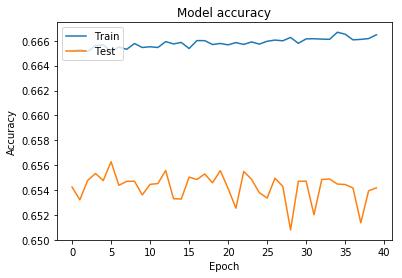

In [148]:
# train on 60% of 2016 and 2017 data, validate on 20% test on 20%
# 3 layers add 0.2 dropout
# learning rate decaying, batch size 128
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [149]:
test_loss, test_acc = model.evaluate(X_test, y_test)

98860/98860 [==============================] - 3s 32us/step


In [150]:
print('Test accuracy:', test_acc)

Test accuracy: 0.650890147683593


In [151]:
y_pred = np.argmax(model.predict(X_test),axis=1)

In [152]:
print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.3409943988505537
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     26497
           1       0.00      0.00      0.00       225
           2       0.35      0.10      0.15      3559
           3       0.65      0.80      0.72     30246
           4       0.38      0.26      0.31      3067
           5       0.31      0.01      0.02      3360
           6       0.58      0.56      0.57      3466
           7       0.66      0.69      0.67     22029
           8       0.29      0.05      0.08      1876
           9       0.32      0.15      0.21      4535

   micro avg       0.65      0.65      0.65     98860
   macro avg       0.43      0.34      0.35     98860
weighted avg       0.61      0.65      0.62     98860

[[21054     0   187  2281   442     9    76  2122    47   279]
 [   48     0     0    72    18     0     4    62     0    21]
 [ 1523     0   351   990    35     6    21   443   116    74]
 [ 1464     0   165 24212   190  

C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Qingyu\Anaconda3\envs\project2env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# find the best number of nodes in layers